<a href="https://colab.research.google.com/github/LHH1115/assignment/blob/main/%EC%84%9C%EC%9A%B8%EC%8B%9C%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline  

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

In [3]:
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]

In [8]:
# # 나눔 폰트 설치
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
# fm._rebuild()   # 하고 런타임 다시 시작

Selecting previously unselected package fonts-nanum.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
nanum_font    # 조회

['/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truet

In [5]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False    # ' - ' 하이픈 깨지는것 방지

NanumGothic Eco


In [6]:
# 현재 설정되어 있는 폰트 사이즈 글꼴
!python --version     # ==> Python 3.8.16
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")
        
current_font()

Python 3.8.16
설정 폰트 글꼴: ['NanumGothic Eco'], 설정 폰트 사이즈: 10.0


In [7]:
from google.colab import drive
drive.mount('/content/gdrive')
row_fine_dust = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Data/서울시 대기질 자료 제공_2020-2021.csv", encoding='CP949')

Mounted at /content/gdrive


In [8]:
row_fine_dust

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
0,2021-05-31 23:00,평균,43.0,23.0
1,2021-05-31 23:00,강남구,42.0,24.0
2,2021-05-31 23:00,강동구,47.0,30.0
3,2021-05-31 23:00,강북구,48.0,27.0
4,2021-05-31 23:00,강서구,49.0,28.0
...,...,...,...,...
322601,2020-01-01 0:00,용산구,12.0,13.0
322602,2020-01-01 0:00,은평구,18.0,12.0
322603,2020-01-01 0:00,종로구,20.0,15.0
322604,2020-01-01 0:00,중구,22.0,18.0


In [9]:
fine_dust = row_fine_dust.copy()

In [10]:
fine_dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322606 entries, 0 to 322605
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           322606 non-null  object 
 1   구분           322606 non-null  object 
 2   미세먼지(PM10)   316048 non-null  float64
 3   초미세먼지(PM25)  318068 non-null  float64
dtypes: float64(2), object(2)
memory usage: 9.8+ MB


In [11]:
fine_dust['일시']

0         2021-05-31 23:00
1         2021-05-31 23:00
2         2021-05-31 23:00
3         2021-05-31 23:00
4         2021-05-31 23:00
                ...       
322601     2020-01-01 0:00
322602     2020-01-01 0:00
322603     2020-01-01 0:00
322604     2020-01-01 0:00
322605     2020-01-01 0:00
Name: 일시, Length: 322606, dtype: object

In [12]:
fine_dust['일시'].isna().sum()

0

In [13]:
fine_dust['일시'] = pd.to_datetime(fine_dust['일시'])

In [14]:
fine_dust['일시']

0        2021-05-31 23:00:00
1        2021-05-31 23:00:00
2        2021-05-31 23:00:00
3        2021-05-31 23:00:00
4        2021-05-31 23:00:00
                 ...        
322601   2020-01-01 00:00:00
322602   2020-01-01 00:00:00
322603   2020-01-01 00:00:00
322604   2020-01-01 00:00:00
322605   2020-01-01 00:00:00
Name: 일시, Length: 322606, dtype: datetime64[ns]

In [15]:
fine_dust['구분'].value_counts()

평균      12408
강남구     12408
종로구     12408
은평구     12408
용산구     12408
영등포구    12408
양천구     12408
송파구     12408
성북구     12408
성동구     12408
서초구     12408
서대문구    12408
마포구     12408
동작구     12408
동대문구    12408
도봉구     12408
노원구     12408
금천구     12408
구로구     12408
광진구     12408
관악구     12408
강서구     12408
강북구     12408
강동구     12408
중랑구     12408
중구      12406
Name: 구분, dtype: int64

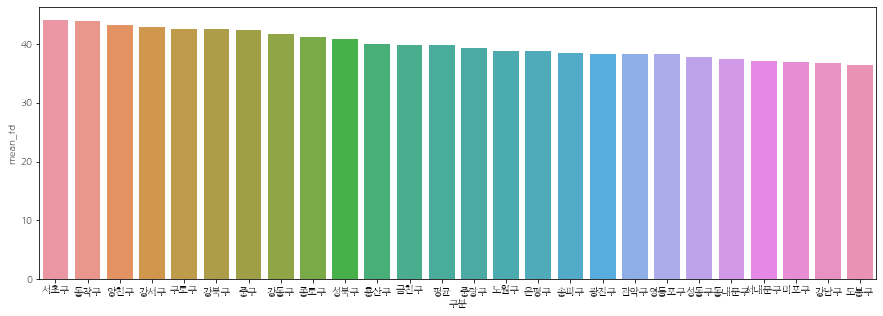

In [16]:
# 지역별 평균 미세먼지 ( 미세먼지(PM10) )
df_loc = fine_dust.groupby('구분', as_index= False).agg(mean_fd = ('미세먼지(PM10)', 'mean'))
df_loc = df_loc.sort_values(by='mean_fd', ascending=False)
plt.rcParams['figure.figsize'] = [15, 5] # [width, height] (inches)
sns.barplot(data = df_loc, x='구분', y='mean_fd')

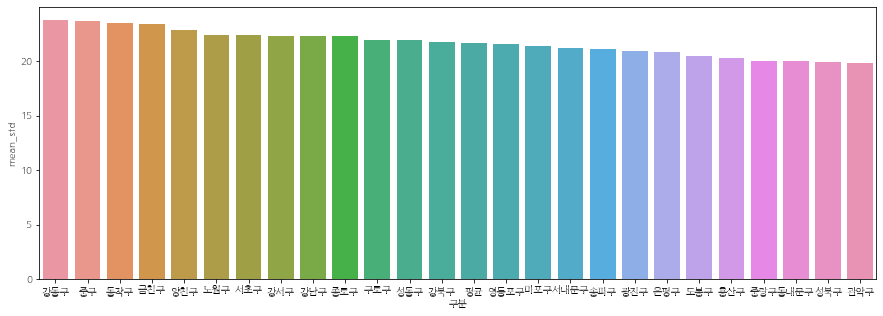

In [17]:
# 지역별 평균 초미세먼지 ( 초미세먼지(PM25) )
df_loc = fine_dust.groupby('구분', as_index= False).agg(mean_sfd = ('초미세먼지(PM25)', 'mean'))
df_loc = df_loc.sort_values(by='mean_sfd', ascending=False)
sns.barplot(data = df_loc, x='구분', y='mean_sfd')

In [18]:
# 모든 지역 평균이 가장 높았던 시간순으로 정렬
print( fine_dust.groupby('일시', as_index= False).agg(mean_fd = ('미세먼지(PM10)', 'mean')).sort_values(by='mean_fd', ascending=False))

                       일시     mean_fd
11833 2021-05-08 01:00:00  867.961538
11832 2021-05-08 00:00:00  846.040000
11834 2021-05-08 02:00:00  812.884615
11831 2021-05-07 23:00:00  794.576923
11835 2021-05-08 03:00:00  728.769231
...                   ...         ...
11022 2021-04-04 06:00:00    3.192308
11020 2021-04-04 04:00:00    3.192308
3365  2020-05-20 05:00:00    3.153846
3364  2020-05-20 04:00:00    3.076923
11024 2021-04-04 08:00:00    3.038462

[12408 rows x 2 columns]


In [19]:
fine_dust['date'] = fine_dust['일시'].dt.date

In [20]:
# 모든 지역 평균이 가장 높은 일별 정렬
print( fine_dust.groupby('date', as_index= False).agg(mean_fd = ('미세먼지(PM10)', 'mean')).sort_values(by='mean_fd', ascending=False))

           date     mean_fd
493  2021-05-08  467.231140
492  2021-05-07  322.266881
453  2021-03-29  273.339806
454  2021-03-30  138.032154
435  2021-03-11  120.808989
..          ...         ...
140  2020-05-20    7.108239
195  2020-07-14    6.124194
205  2020-07-24    5.449013
206  2020-07-25    5.118780
250  2020-09-07    5.091503

[517 rows x 2 columns]


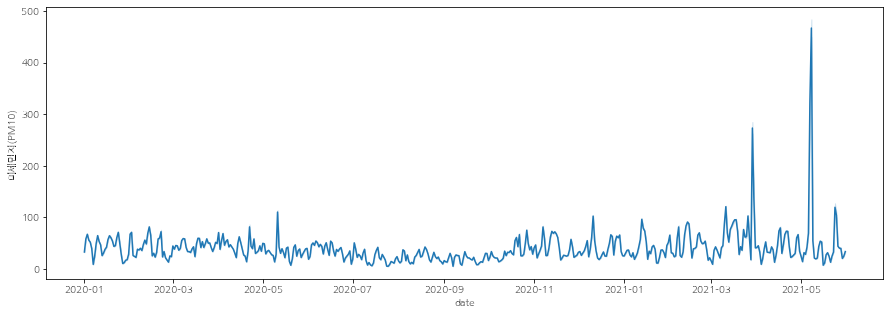

In [21]:
sns.lineplot(data = fine_dust, x='date',y='미세먼지(PM10)')

In [22]:
# 미세먼지 평균이 가장 높은 달 표현
fine_dust['month'] = fine_dust['일시'].dt.month

In [23]:
print( fine_dust.groupby('month', as_index= False).agg(mean_fd = ('미세먼지(PM10)', 'mean')).sort_values(by='mean_fd', ascending=False))

    month    mean_fd
2       3  56.069163
4       5  47.873568
1       2  44.561166
3       4  42.812649
10     11  41.770826
11     12  41.728784
0       1  40.107545
5       6  36.389101
9      10  33.350126
7       8  22.834620
6       7  20.916569
8       9  19.227641


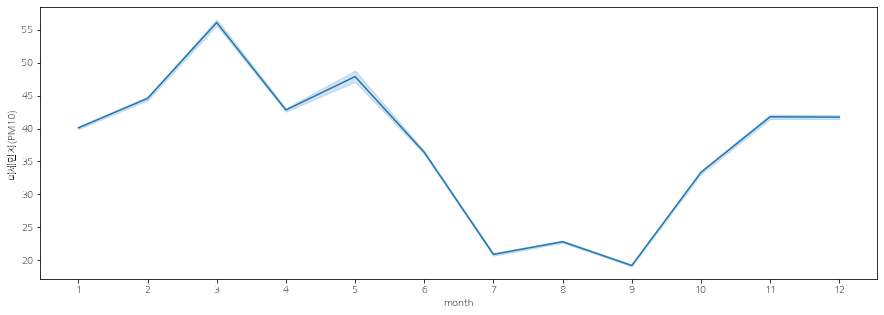

In [25]:
plt.xticks(np.arange(1,13))
sns.lineplot(data = fine_dust, x='month',y='미세먼지(PM10)')

In [26]:
# 미세먼지 평균이 가장 높은 시간 표현
fine_dust['hour'] = fine_dust['일시'].dt.hour

In [27]:
print( fine_dust.groupby('hour', as_index= False).agg(mean_fd = ('미세먼지(PM10)', 'mean')).sort_values(by='mean_fd', ascending=False))

    hour    mean_fd
11    11  43.396890
12    12  42.032789
13    13  41.942305
10    10  41.799592
17    17  41.429519
15    15  41.248553
19    19  41.233391
21    21  40.828250
9      9  40.782129
14    14  40.650715
18    18  40.558527
16    16  40.468726
23    23  40.366191
20    20  40.276471
22    22  39.634986
1      1  39.441824
0      0  39.019205
7      7  38.165962
3      3  38.155608
8      8  38.101867
5      5  37.724992
2      2  37.641008
6      6  36.958733
4      4  36.867211


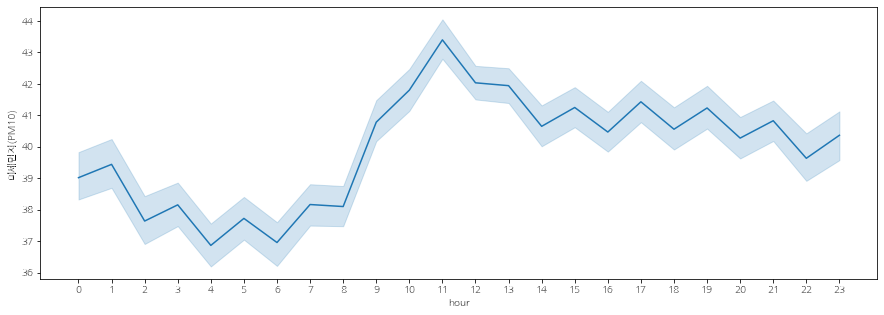

In [30]:
plt.xticks(np.arange(0,24))
sns.lineplot(data = fine_dust, x='hour',y='미세먼지(PM10)')